Caricando: ../data/copia_2024.06.26_PARIS_Noyau_Org_12_cauliflower_J7_40X_8bit.tif
Dimensioni volume: (181, 512, 512)


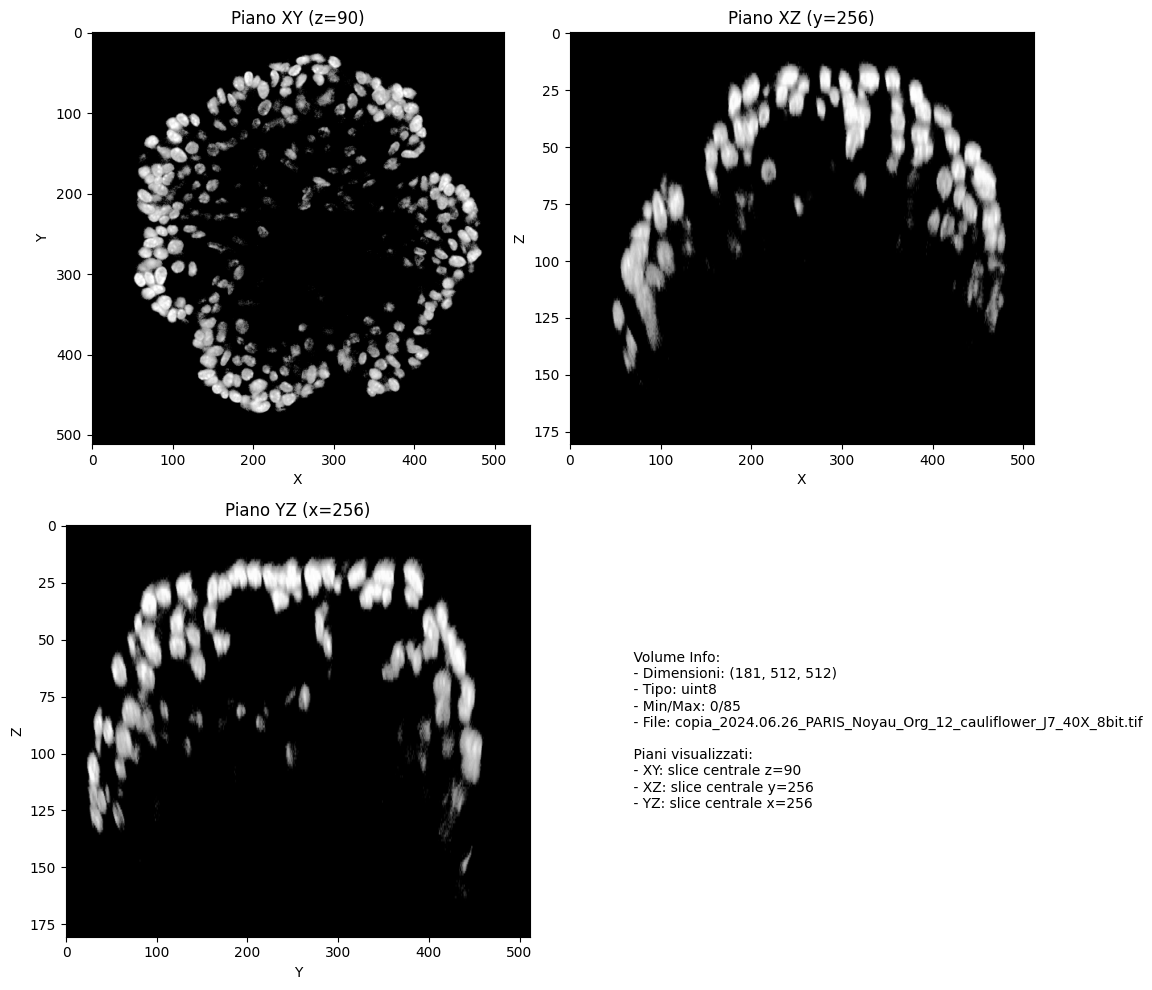

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import os
import glob
import napari


def load_file_and_visualize_3d_planes(data_folder="../data"):
    """
    Carica un file .tif 3D e visualizza i tre piani ortogonali (xy, xz, yz)
    """
    
    # Trova tutti i file .tif nella cartella
    tif_files = glob.glob(os.path.join(data_folder))
    
    if not tif_files:
        print(f"Nessun file .tif trovato nella cartella {data_folder}")
        return
    
    # Usa il primo file trovato (o puoi modificare per scegliere)
    tif_path = tif_files[0]
    print(f"Caricando: {tif_path}")
    
    # Carica il volume 3D
    try:
        volume = io.imread(tif_path)
        print(f"Dimensioni volume: {volume.shape}")
        
        # Assicurati che sia 3D
        if len(volume.shape) < 3:
            print("Il file non sembra essere un volume 3D")
            return
            
    except Exception as e:
        print(f"Errore nel caricamento del file: {e}")
        return
    
    # Se il volume ha 4 dimensioni (z, y, x, canali), prendi solo il primo canale
    if len(volume.shape) == 4:
        volume = volume[:, :, :, 0]
    
    z_size, y_size, x_size = volume.shape
    
    # Calcola le slice centrali per ogni piano
    z_center = z_size // 2
    y_center = y_size // 2
    x_center = x_size // 2
    
    # Estrai le slice dai tre piani
    xy_slice = volume[z_center, :, :]      # Piano xy (fissando z)
    xz_slice = volume[:, y_center, :]      # Piano xz (fissando y)
    yz_slice = volume[:, :, x_center]      # Piano yz (fissando x)
    
    # Visualizza i tre piani
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    
    # Piano XY (vista dall'alto)
    axes[0, 0].imshow(xy_slice, cmap='gray')
    axes[0, 0].set_title(f'Piano XY (z={z_center})')
    axes[0, 0].set_xlabel('X')
    axes[0, 0].set_ylabel('Y')
    
    # Piano XZ (sezione laterale)
    axes[0, 1].imshow(xz_slice, cmap='gray', aspect='auto')
    axes[0, 1].set_title(f'Piano XZ (y={y_center})')
    axes[0, 1].set_xlabel('X')
    axes[0, 1].set_ylabel('Z')
    
    # Piano YZ (sezione frontale)
    axes[1, 0].imshow(yz_slice, cmap='gray', aspect='auto')
    axes[1, 0].set_title(f'Piano YZ (x={x_center})')
    axes[1, 0].set_xlabel('Y')
    axes[1, 0].set_ylabel('Z')
    
    # Informazioni sul volume
    axes[1, 1].axis('off')
    info_text = f"""
    Volume Info:
    - Dimensioni: {volume.shape}
    - Tipo: {volume.dtype}
    - Min/Max: {volume.min()}/{volume.max()}
    - File: {os.path.basename(tif_path)}
    
    Piani visualizzati:
    - XY: slice centrale z={z_center}
    - XZ: slice centrale y={y_center}  
    - YZ: slice centrale x={x_center}
    """
    axes[1, 1].text(0.1, 0.5, info_text, fontsize=10, verticalalignment='center')
    
    plt.tight_layout()
    plt.show()
    
    return volume

def load_and_visualize_3d_planes(data_folder="../data"):
    """
    Carica un file .tif 3D e visualizza i tre piani ortogonali (xy, xz, yz)
    """
    
    # Trova tutti i file .tif nella cartella
    tif_files = glob.glob(os.path.join(data_folder, "*.tif"))
    
    if not tif_files:
        print(f"Nessun file .tif trovato nella cartella {data_folder}")
        return
    
    # Usa il primo file trovato (o puoi modificare per scegliere)
    tif_path = tif_files[0]
    print(f"Caricando: {tif_path}")
    
    # Carica il volume 3D
    try:
        volume = io.imread(tif_path)
        print(f"Dimensioni volume: {volume.shape}")
        
        # Assicurati che sia 3D
        if len(volume.shape) < 3:
            print("Il file non sembra essere un volume 3D")
            return
            
    except Exception as e:
        print(f"Errore nel caricamento del file: {e}")
        return
    
    # Se il volume ha 4 dimensioni (z, y, x, canali), prendi solo il primo canale
    if len(volume.shape) == 4:
        volume = volume[:, :, :, 0]
    
    z_size, y_size, x_size = volume.shape
    
    # Calcola le slice centrali per ogni piano
    z_center = z_size // 2
    y_center = y_size // 2
    x_center = x_size // 2
    
    # Estrai le slice dai tre piani
    xy_slice = volume[z_center, :, :]      # Piano xy (fissando z)
    xz_slice = volume[:, y_center, :]      # Piano xz (fissando y)
    yz_slice = volume[:, :, x_center]      # Piano yz (fissando x)
    
    # Visualizza i tre piani
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    
    # Piano XY (vista dall'alto)
    axes[0, 0].imshow(xy_slice, cmap='gray')
    axes[0, 0].set_title(f'Piano XY (z={z_center})')
    axes[0, 0].set_xlabel('X')
    axes[0, 0].set_ylabel('Y')
    
    # Piano XZ (sezione laterale)
    axes[0, 1].imshow(xz_slice, cmap='gray', aspect='auto')
    axes[0, 1].set_title(f'Piano XZ (y={y_center})')
    axes[0, 1].set_xlabel('X')
    axes[0, 1].set_ylabel('Z')
    
    # Piano YZ (sezione frontale)
    axes[1, 0].imshow(yz_slice, cmap='gray', aspect='auto')
    axes[1, 0].set_title(f'Piano YZ (x={x_center})')
    axes[1, 0].set_xlabel('Y')
    axes[1, 0].set_ylabel('Z')
    
    # Informazioni sul volume
    axes[1, 1].axis('off')
    info_text = f"""
    Volume Info:
    - Dimensioni: {volume.shape}
    - Tipo: {volume.dtype}
    - Min/Max: {volume.min()}/{volume.max()}
    - File: {os.path.basename(tif_path)}
    
    Piani visualizzati:
    - XY: slice centrale z={z_center}
    - XZ: slice centrale y={y_center}  
    - YZ: slice centrale x={x_center}
    """
    axes[1, 1].text(0.1, 0.5, info_text, fontsize=10, verticalalignment='center')
    
    plt.tight_layout()
    plt.show()
    
    return volume

def interactive_slice_viewer(data_folder="../data"):
    """
    Versione interattiva per esplorare diverse slice
    """
    import ipywidgets as widgets
    from IPython.display import display
    
    # Carica il volume
    tif_files = glob.glob(os.path.join(data_folder, "*.tif"))
    if not tif_files:
        print(f"Nessun file .tif trovato nella cartella {data_folder}")
        return
        
    volume = io.imread(tif_files[0])
    if len(volume.shape) == 4:
        volume = volume[:, :, :, 0]
    
    z_size, y_size, x_size = volume.shape
    
    def plot_slices(z_idx, y_idx, x_idx):
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        
        # Piano XY
        axes[0].imshow(volume[z_idx, :, :], cmap='gray')
        axes[0].set_title(f'Piano XY (z={z_idx})')
        axes[0].set_xlabel('X')
        axes[0].set_ylabel('Y')
        
        # Piano XZ  
        axes[1].imshow(volume[:, y_idx, :], cmap='gray', aspect='auto')
        axes[1].set_title(f'Piano XZ (y={y_idx})')
        axes[1].set_xlabel('X')
        axes[1].set_ylabel('Z')
        
        # Piano YZ
        axes[2].imshow(volume[:, :, x_idx], cmap='gray', aspect='auto')
        axes[2].set_title(f'Piano YZ (x={x_idx})')
        axes[2].set_xlabel('Y')
        axes[2].set_ylabel('Z')
        
        plt.tight_layout()
        plt.show()
    
    # Widget interattivi
    z_slider = widgets.IntSlider(value=z_size//2, min=0, max=z_size-1, description='Z slice:')
    y_slider = widgets.IntSlider(value=y_size//2, min=0, max=y_size-1, description='Y slice:')
    x_slider = widgets.IntSlider(value=x_size//2, min=0, max=x_size-1, description='X slice:')
    
    widgets.interact(plot_slices, z_idx=z_slider, y_idx=y_slider, x_idx=x_slider)

#url = '/Volumes/LaCie/Noyaux/Chouxfleurs/raw_202502_Nice_orga0_31.tif'
#volume = load_file_and_visualize_3d_planes(url)

url = "../data/copia_2024.06.26_PARIS_Noyau_Org_12_cauliflower_J7_40X_8bit.tif"
#volume = load_and_visualize_3d_planes(url)
volume = load_file_and_visualize_3d_planes(url)


In [4]:
print(volume[0].shape)

(512, 512)


In [ ]:
import tifffile as tiff
from skimage.transform import resize
import numpy as np

input_path = '../data/2024.06.26_PARIS_Noyau_Org_12_cauliflower_J7_40X_8bit.tif'        # Il tuo file sorgente (1024x1024 per slice)
output_path = '../data/copia_2024.06.26_PARIS_Noyau_Org_12_cauliflower_J7_40X_8bit.tif'  # Nome file di destinazione

# Carica il file .tif come array 3D
volume = tiff.imread(input_path)      # shape tipica (N, 1024, 1024)
print('Original shape:', volume.shape)

# Ridimensiona ogni slice (funziona anche su 3D e 4D)
resized_volume = resize(volume, (volume.shape[0], 512, 512), order=1, preserve_range=True, anti_aliasing=True).astype(volume.dtype)
print('Resized shape:', resized_volume.shape)

# Salva il nuovo stack TIFF
tiff.imwrite(output_path, resized_volume)
print(f'Salvato: {output_path}')
sizeOfInput = os.path.getsize(input_path)
print(f'Size of input file: {sizeOfInput} bytes')
sizeOfOutput = os.path.getsize(output_path)
print(f'Size of output file: {sizeOfOutput} bytes')
reduction = (1 - sizeOfOutput / sizeOfInput) * 100
print(f'Reduction in file size: {reduction:.2f}%')